In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
plt.rcParams['font.size'] = 14
#import pylab_util as PU
import os

In [2]:
def data_to_float_array(data):
    mylist = data.split('\n')
    clean_list = mylist#[3:]
    clean_2 = list(filter(None,clean_list))
    
    start_ind = None
    
    for i, row in enumerate(clean_2):
        if row.find("1,") == 0:
            start_ind = i
    
    end_ind = None
    
    for i, row in enumerate(clean_2):
        if row.find("input") > -1:
            end_ind = i
            
    clean_3 = clean_2[start_ind:end_ind]
    nested_list = [row.split(',') for row in clean_3]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array
    #return str_array

In [3]:
import control
#import digcomp

In [4]:
import serial
import serial_utils

In [5]:
import importlib

In [6]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/pi/SBR_git/serial_utils.py'>

In [7]:
import platform

In [8]:
plat_str = platform.platform().lower()
plat_str

'linux-4.9.41-v7+-armv7l-with-debian-9.1'

In [9]:
myos = 'win'

if 'linux' in plat_str:
    myos = 'linux'
elif 'darwin' in plat_str:
    myos = 'mac'

print('myos: %s' % myos)

myos: linux


In [10]:
if myos == 'linux':
    portname = serial_utils.find_portname_RPi()
elif myos == 'mac':
    #portname = '/dev/tty.usbmodem1421'
    portname = '/dev/cu.usbmodem1421'
else:
    portname = 'COM3'
    
print('portname: %s' % portname)

portname: /dev/ttyACM0


In [11]:
ser = serial_utils.serial_test(portname)

In [12]:
ser.open()

In [13]:
ser.print_all()

motor testing v. 1.0.0
input test case




In [14]:
ser.flush()

In [15]:
ser.write_char("c")

In [17]:
ser.print_all()

In [18]:
ser.print_all()

In [19]:
ser.write_char("n")
ser.write_float(50)

In [20]:
ser.print_all()

nom = 50
input test case

input test case

input test case

input test case

input test case

input test case




In [21]:
ser.write_char("1")
time.sleep(0.1)
data = ser.get_data()

In [22]:
data_array = data_to_float_array(data)

In [23]:
print(data)

#====================
kp=0.0500
#raw_loop_count,n_loop, t_ms, e, pwm1, pwm2, position
1,0.00,862,0,0,2138
2,4.98,850,0,0,2150
3,9.98,850,0,0,2150
4,14.96,863,0,0,2137
5,20.00,863,0,0,2137
6,25.03,863,0,0,2137
7,30.06,861,0,0,2139
8,35.06,849,0,0,2151
9,40.06,849,0,0,2151
10,45.09,849,0,0,2151
11,50.19,849,8,92,2151
12,55.34,865,7,93,2135
13,60.49,865,7,93,2135
14,65.64,865,7,93,2135
15,70.79,861,7,93,2139
16,75.91,861,7,93,2139
17,81.03,861,7,93,2139
18,86.14,853,8,92,2147
19,91.26,843,8,92,2157
20,96.42,815,10,90,2185
21,101.62,783,11,89,2217
22,106.82,740,13,87,2260
23,112.07,712,15,85,2288
24,117.31,663,17,83,2337
25,122.56,641,18,82,2359
26,127.80,603,20,80,2397
27,133.06,563,22,78,2437
28,138.30,529,24,76,2471
29,143.55,500,25,75,2500
30,148.80,406,30,70,2594
31,154.05,376,32,68,2624
32,159.26,299,36,64,2701
33,164.53,261,37,63,2739
34,169.79,205,40,60,2795
35,175.00,156,43,57,2844
36,180.23,118,45,55,2882
37,185.46,90,46,54,2910
38,190.65,62,47,53,2938
39,195.84,33,49,51,2967
40,

In [24]:
t_ms = data_array[:,1]
e = data_array[:,2]
pwm1 = data_array[:,3]
pwm2 = data_array[:,4]
pos = data_array[:,-1]
t = t_ms/1000

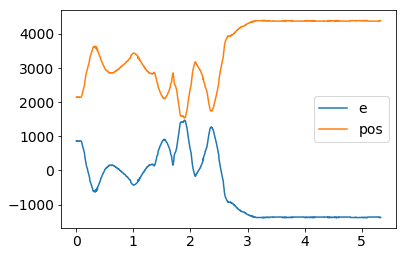

In [25]:
plt.figure()
plt.plot(t,e,t,pos)
plt.legend(['e','pos'])

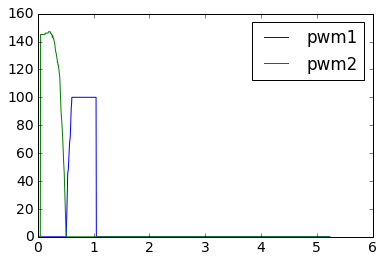

In [92]:
plt.figure()
plt.plot(t,pwm1,t,pwm2)
plt.legend(['pwm1','pwm2'])

In [80]:
ser.write_char("k")
ser.write_float(0.03)

In [81]:
ser.print_all()

kp = 0.0300
input test case


